In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop

from zipfile import ZipFile
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
file_name = '/home/utsab/Downloads/asl_alphabet_train.zip' #put path name here

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
#datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
#datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255.0)
datagen = ImageDataGenerator(validation_split=0.2)
training_files = '/home/utsab/Downloads/asl_alphabet_train' #put path name here
train_generator = datagen.flow_from_directory(training_files, 
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode='categorical',
                                              subset="training")
val_generator = datagen.flow_from_directory(training_files, 
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode='categorical',
                                              subset="validation")

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
train_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [ ]:
model=Sequential()
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2, input_shape=[224,224,3]))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=2, activation='relu', strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(29,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 64)      832       
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        1

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_history = model.fit(train_generator, epochs=12, validation_data=val_generator, verbose=1)

Epoch 1/12
 53/272 [====>.........................] - ETA: 8:35 - loss: 5.9226 - accuracy: 0.0339

KeyboardInterrupt: 

In [ ]:
def plot_history(history):
    # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
plot_history(model_history)
print(model_history.history['loss'])

In [ ]:
plt.title('Loss')
loss=[11.4705,3.2451,2.9059,2.4459,1.7780,1.1458,0.7925,0.5767,0.4562,0.3718,0.3019,0.2606]
val_loss=[3.3671,3.2815,2.9879,2.6108,2.2152,2.2590,2.2947,2.2824,2.3854,2.5655,2.2691,2.39]
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
file_name = '/home/utsab/Downloads/asl_alphabet_test.zip' #put path name here

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
testing_files = '/home/utsab/Downloads/asl_alphabet_test'

In [ ]:
test_datagen = ImageDataGenerator()
print(test_datagen.type)
test_generator = test_datagen.flow_from_directory(testing_files, 
                                              shuffle=False,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode=None)

AttributeError: 'ImageDataGenerator' object has no attribute 'type'

In [ ]:
test_generator.class_indices

In [ ]:
predictions = model.predict(test_generator)
print(predictions)

In [ ]:
# create CSV file
np.savetxt("baseline_asl_prediction.csv", np.argmax(predictions,axis=1), delimiter=",")

In [ ]:
print(np.argmax(predictions,axis=1))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#prediction = model.predict(test_generator)
#yhat_classes = model.predict_classes(test_generator, verbose=0)
#accuracy = accuracy_score(test_generator, yhat_classes)
#Y_pred_classes = np.argmax(prediction,axis = 1) 
#Y_true = np.argmax(test_generator,axis = 1)
#accuracy = accuracy_score(Y_pred_classes, Y_true)
#yhat_classes = model.predict_classes(test_generator, verbose=0)
#yhat_classes = yhat_classes[:, 0]
#print(yhat_classes)
test_y=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
test_y=np.array(test_y)
yhat_classes=[0,1,2,3,4,5,6,7,8,7,10,11,12,13,14,15,16,17,18,19,25,21,22,23,23,25,27,28]
yhat_classes=np.array(yhat_classes)
print(test_y)
accuracy = accuracy_score(test_y, yhat_classes)
print('Accuracy: %f' % accuracy)
f1 = f1_score(test_y, yhat_classes, average='weighted')
print('F1 score: %f' % f1)
'''precision = precision_score(y_val, yhat_classes, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_val, yhat_classes, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_val, yhat_classes, average='weighted')
print('F1 score: %f' % f1)'''

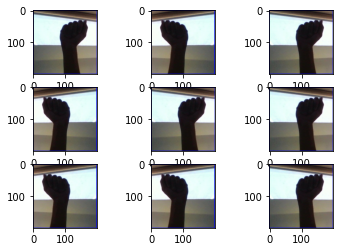

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('/home/utsab/Downloads/asl_alphabet_test/test/A_test.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
def gen_batch(batch_it):
    for i in range(1):
       # define subplot
       pyplot.subplot(330 + 1 + i)
       # generate batch of images
       batch = batch_it.next()
       # convert to unsigned integers for viewing
       for j in range(batch.shape[0]):
           image = batch[j].astype('uint8')
           # plot raw pixel data
           pyplot.imshow(image)
           # show the figure
           pyplot.show()
    return batch

Found 28 images belonging to 1 classes.
Found 28 images belonging to 1 classes.


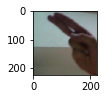

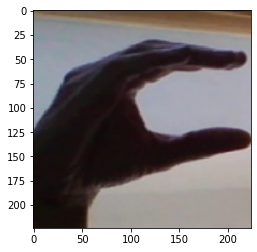

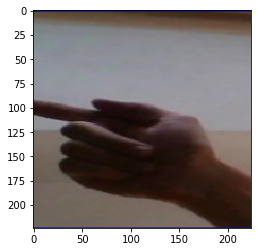

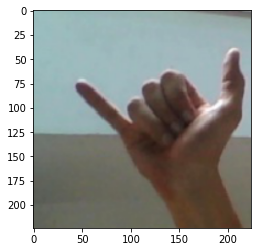

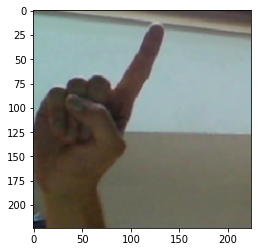

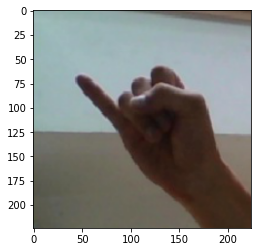

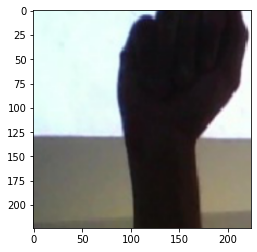

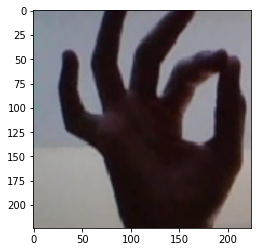

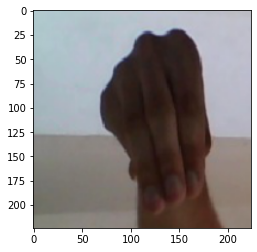

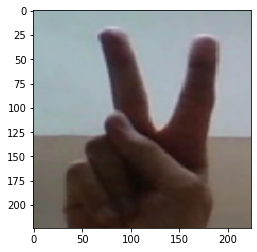

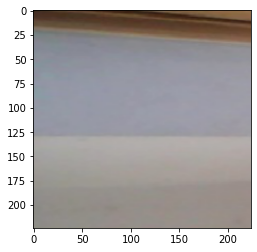

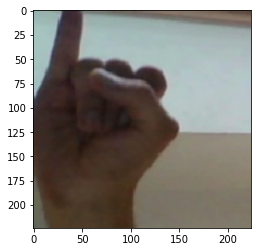

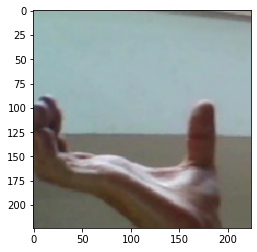

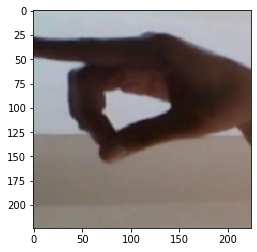

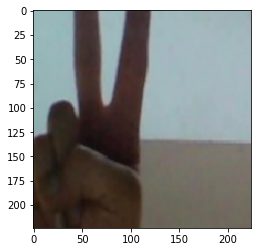

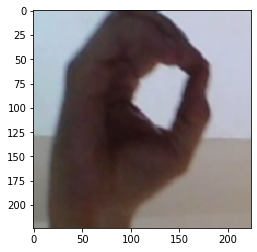

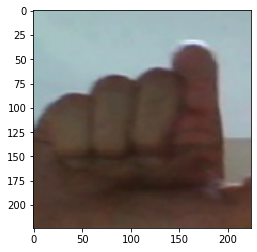

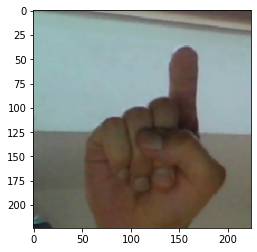

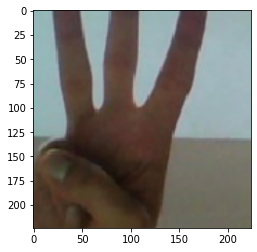

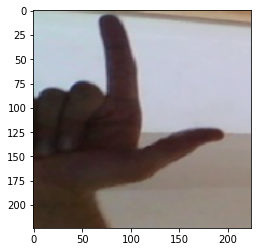

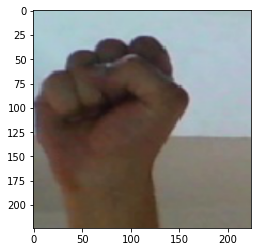

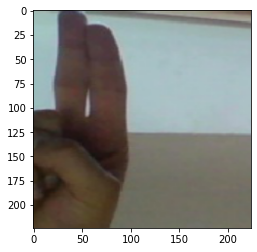

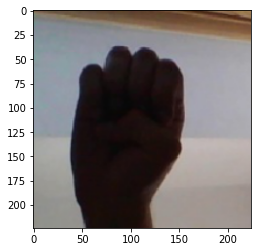

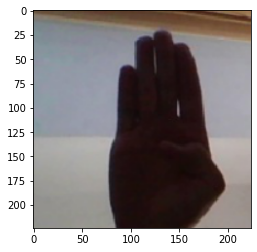

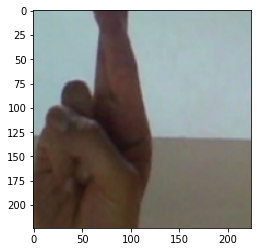

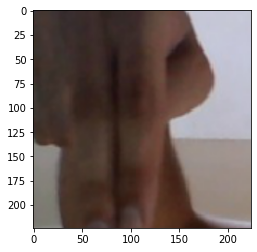

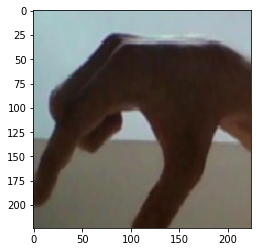

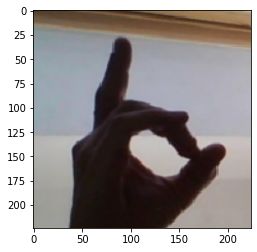

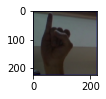

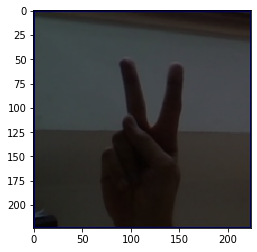

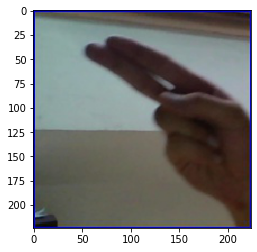

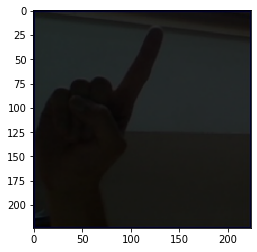

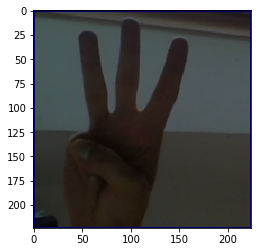

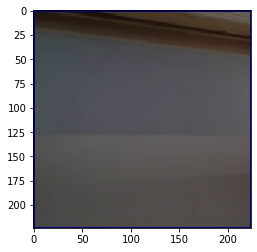

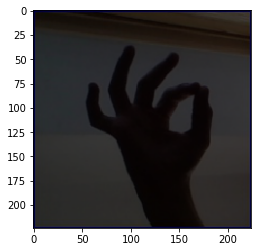

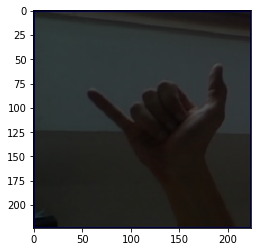

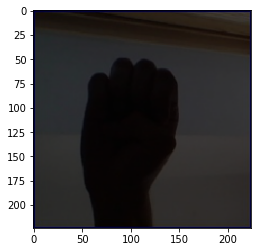

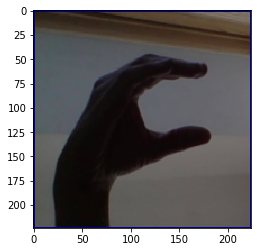

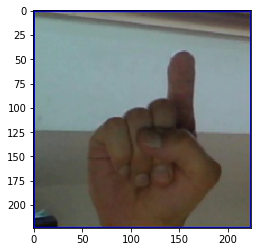

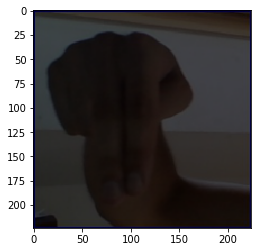

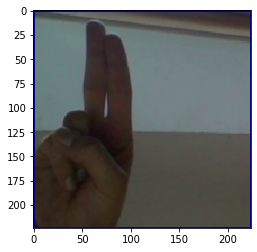

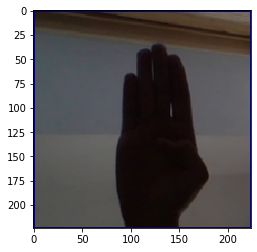

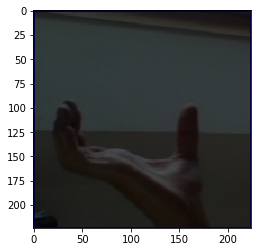

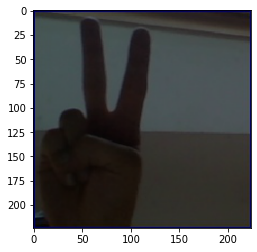

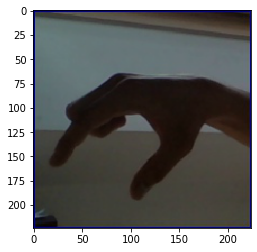

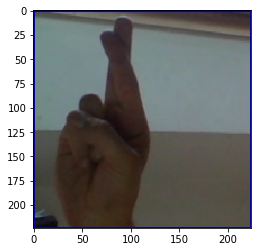

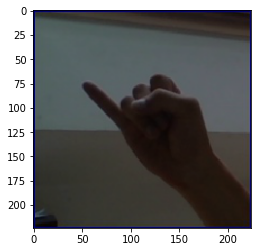

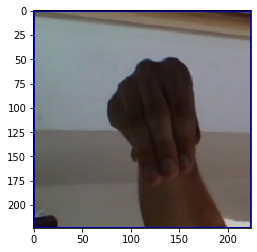

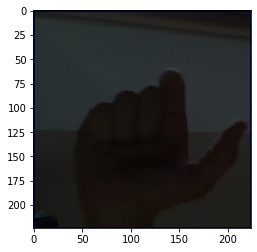

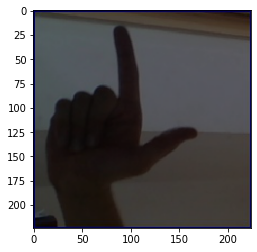

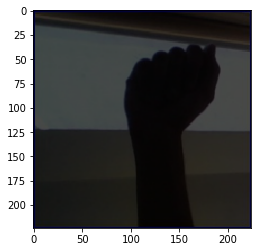

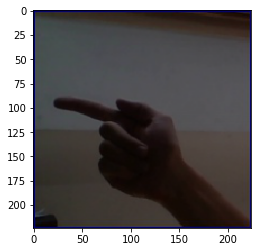

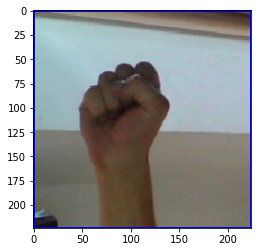

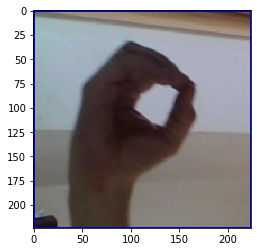

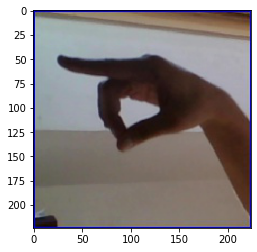

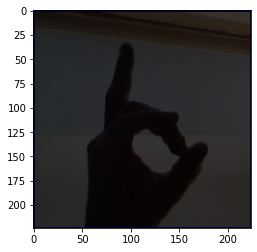

(28, 224, 224, 3)
(28, 224, 224, 3)
(56, 224)
(56, 224, 224, 3)


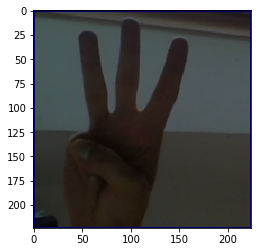

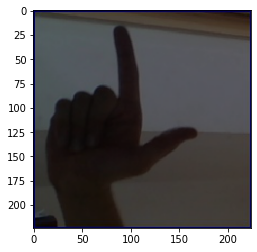

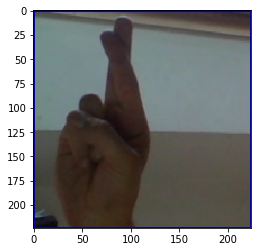

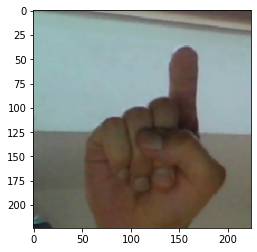

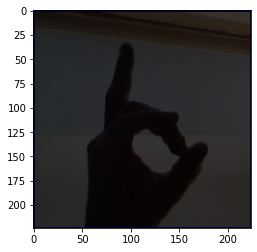

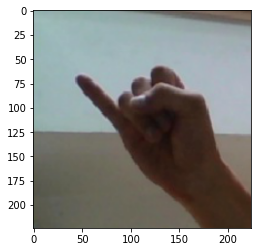

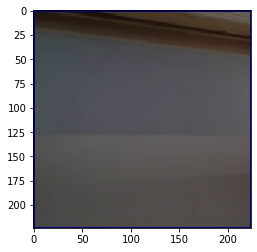

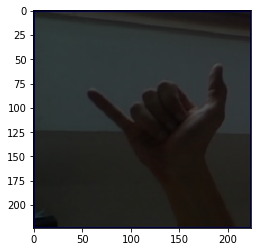

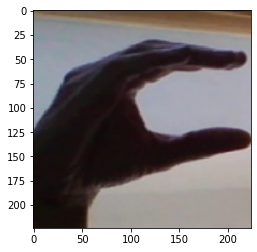

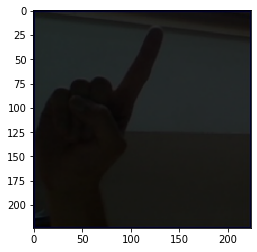

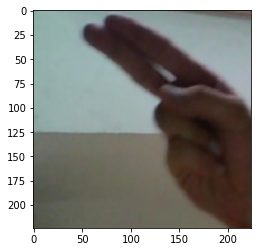

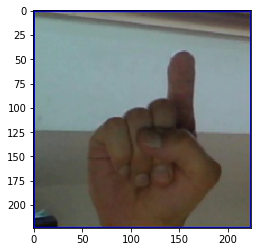

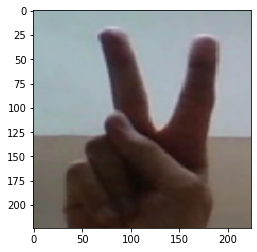

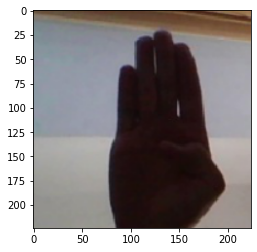

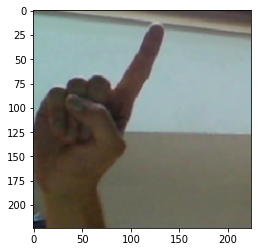

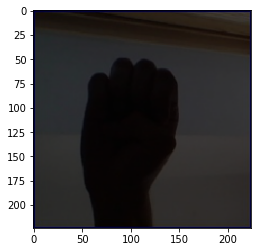

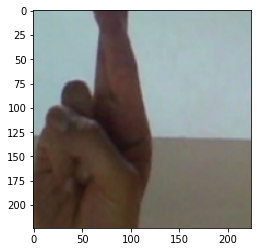

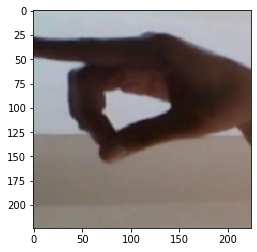

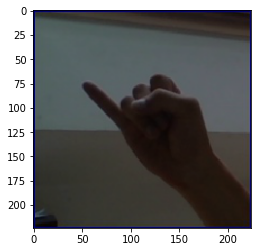

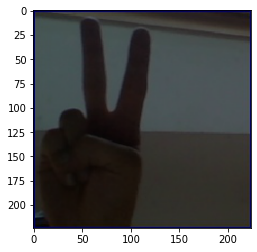

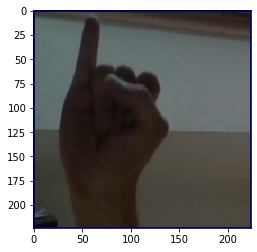

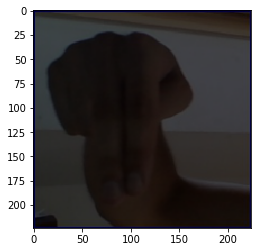

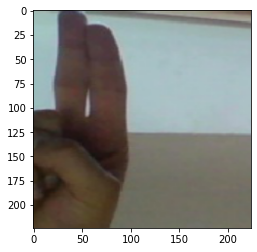

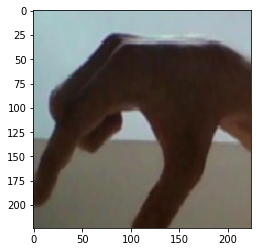

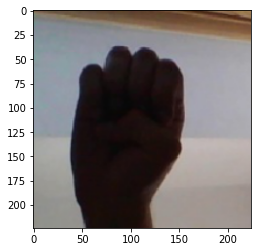

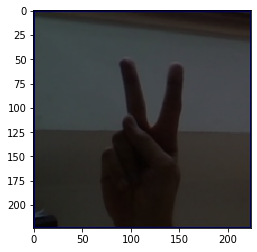

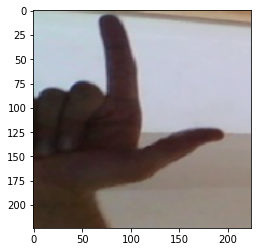

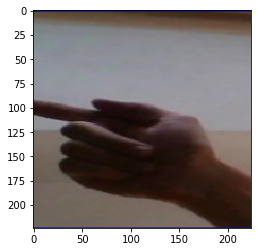

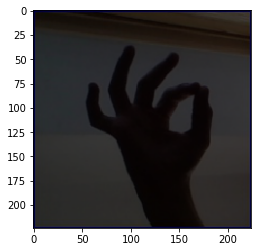

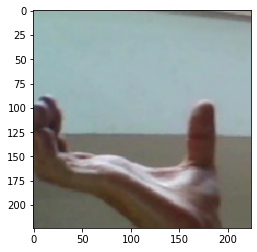

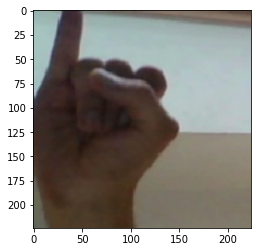

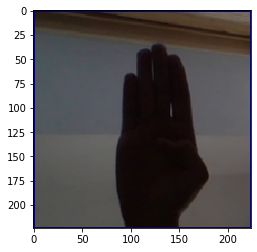

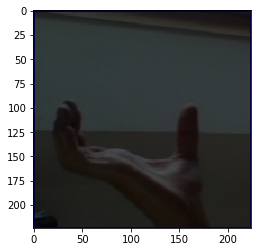

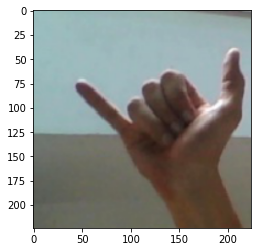

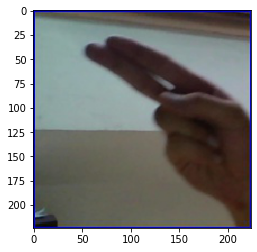

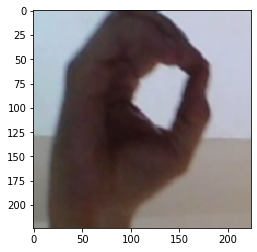

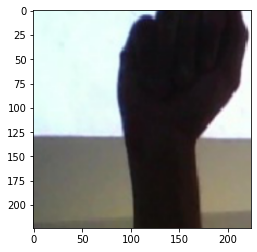

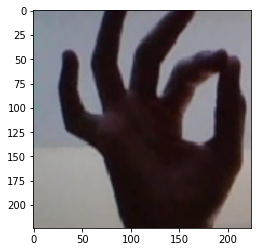

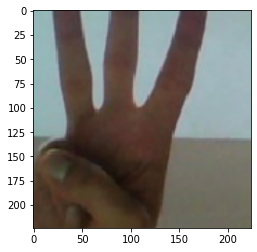

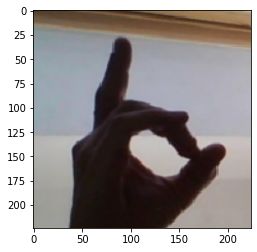

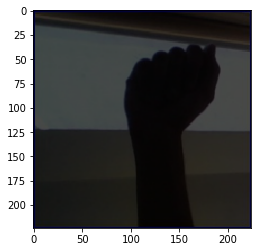

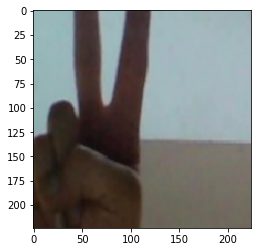

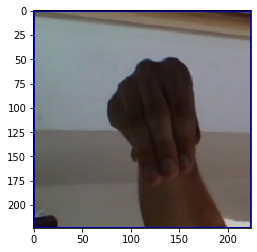

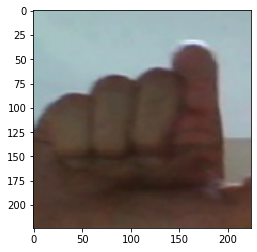

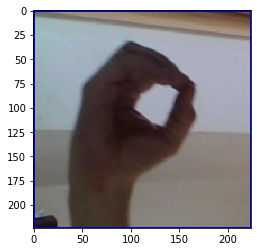

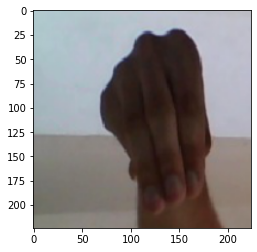

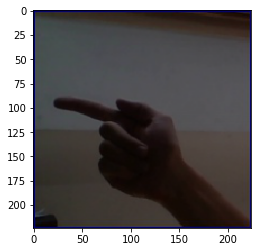

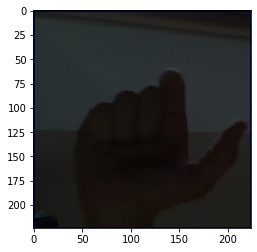

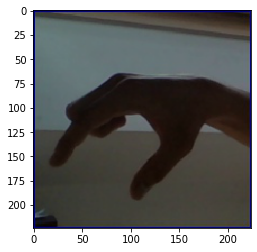

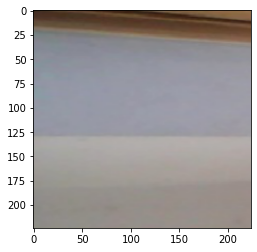

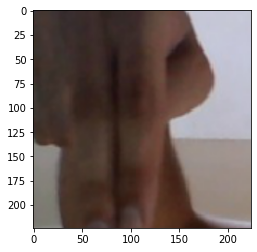

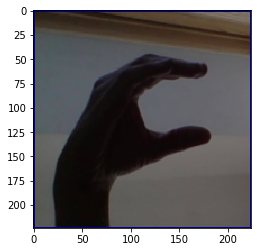

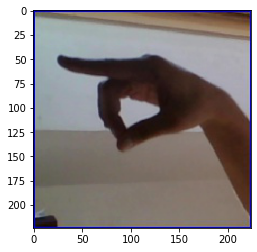

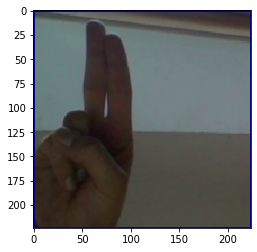

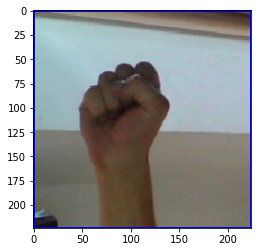

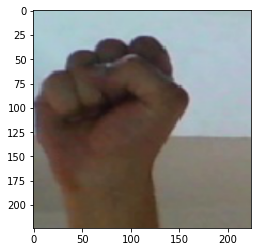

In [ ]:
datagen_z = ImageDataGenerator(zoom_range=[0.5,1.0])
datagen_b = ImageDataGenerator(brightness_range=[0.2,1.0])
test_files = '/home/utsab/Downloads/asl_alphabet_test'
# prepare iterator
it_z = datagen_z.flow_from_directory(test_files, 
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode=None)
it_r = datagen_b.flow_from_directory(test_files, 
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode=None)
batch_z = gen_batch(it_z)
batch_r = gen_batch(it_r)
batch_concat=np.vstack((batch_z,batch_r))
print(batch_z.shape)
print(batch_r.shape)
df_batch=pd.DataFrame.from_records(batch_concat)
print(df_batch.shape)
datagen_x = ImageDataGenerator()
flw = datagen_x.flow(batch_concat,batch_size=56)
#print(flw.shape)
tst=flw.next()
print(tst.shape)
for j in range(tst.shape[0]):
    image = tst[j].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()

Found 28 images belonging to 1 classes.


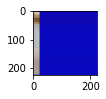

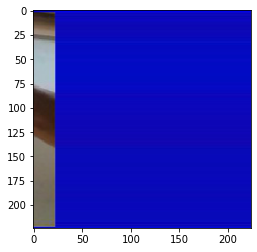

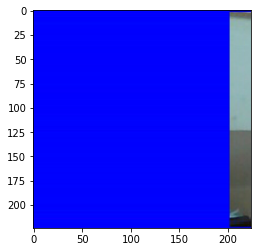

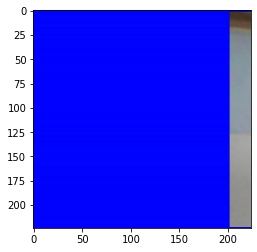

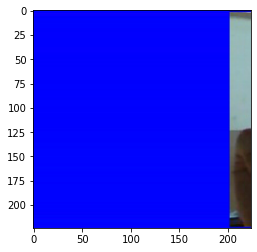

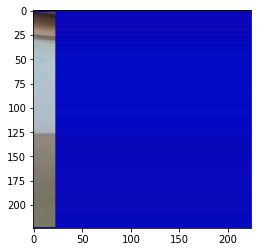

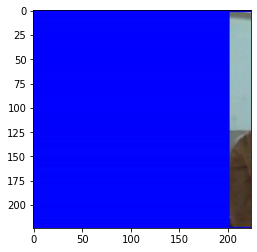

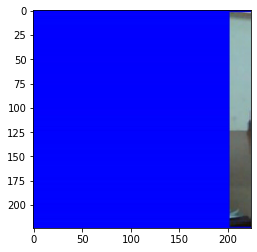

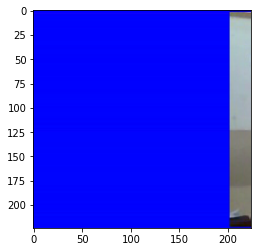

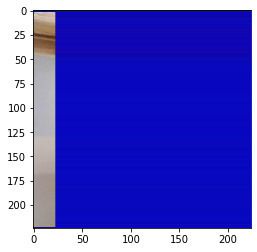

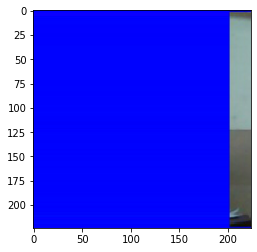

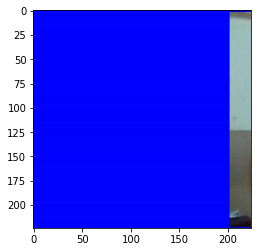

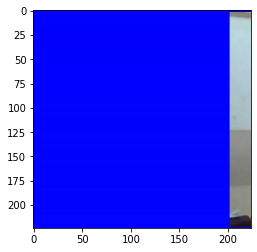

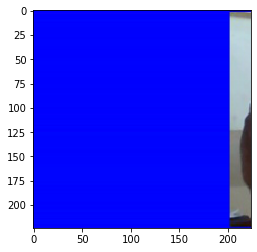

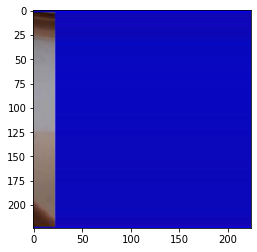

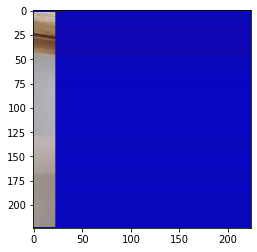

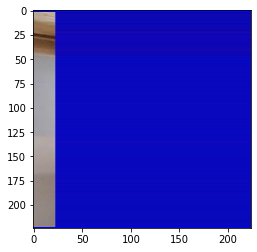

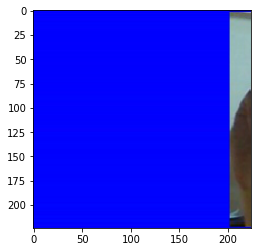

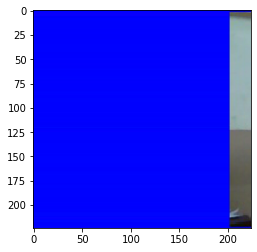

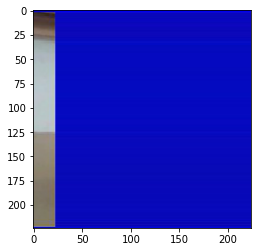

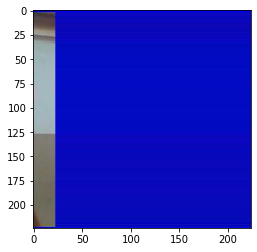

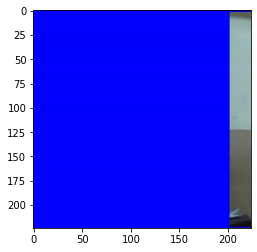

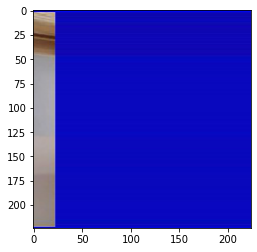

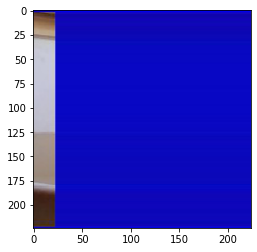

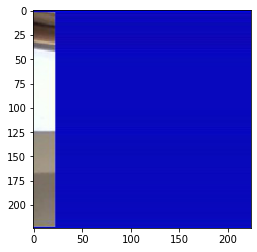

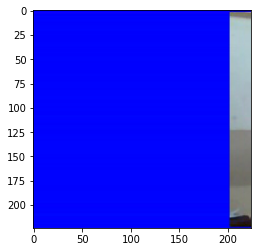

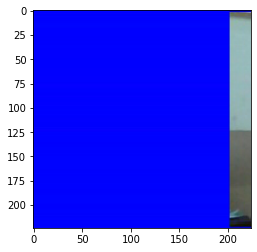

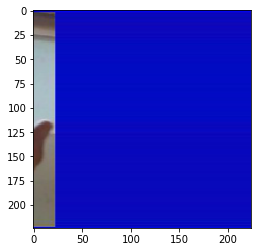

(28, 224, 224, 3)


AttributeError: 'zip' object has no attribute 'shape'

In [ ]:
it_w = datagen_w.flow_from_directory(test_files, 
                                              shuffle=True,
                                              target_size=(224,224),
                                              batch_size=256,
                                              class_mode=None)
batch_w = gen_batch(it_w)
print(batch_w.shape)
batch_all = zip(batch_z, batch_w)
print(batch_all.shape)

In [ ]:
from itertools import chain
#generator = chain(batch_z, batch_w)
np.concatenate(batch_z,batch_w)

TypeError: only integer scalar arrays can be converted to a scalar index